<a href="https://colab.research.google.com/github/sogand73/OCT-Classification/blob/main/representative_dictionary_learning_for_OCT_(Kermany_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 10.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Data preparing for Dictionary Learning

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download paultimothymooney/kermany2018/

100% 10.8G/10.8G [06:27<00:00, 36.7MB/s]
100% 10.8G/10.8G [06:27<00:00, 30.0MB/s]


In [ ]:
!unzip kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
# @title Selection of some images as the dataset for dictionary learning (open and store)

In [3]:
shutil.rmtree('/content/oct_my_dictl_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dictl_dataset'

In [4]:
!mkdir '/content/oct_my_dictl_dataset'


In [5]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/oct_my_dictl_dataset/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [6]:
# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset/train/'
#dataset_folder = '/content/OCT2017 /train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dictl_dataset/'  # Replace with your destination folder path
images =[]
#for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for file_name in files_to_copy[:20]:
    if file_name.endswith('.jpeg'):  # Specify the image file formats
          source_path = os.path.join(source_folder, file_name)
          destination_path = os.path.join(destination_folder, subfolder) + '/'
          shutil.copy(source_path, destination_path)
          img = Image.open(os.path.join(destination_path, file_name)) # This returns an image object
          #print(img.mode)
          #img = img.convert('RGB')
          img = np.asarray(img) # convert it to ndarray
          img = cv2.resize(img, (512, 512))
          images.append(img)
#return np.array(images)
          #print(f"Copied: {file_name}")






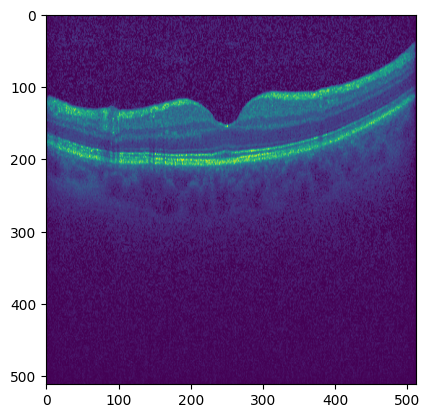

In [7]:
plt.imshow(images[2])

In [ ]:
#@title dictionary Learning Processs

In [8]:
# Load dictionary learning images
image_data = np.asarray(images)
n_images, height, width = image_data.shape

In [9]:
# Flatten the image data
X = image_data.reshape((n_images, height * width))

# Explicitly cast the array to float before division
X = X.astype(float)

# Rescale pixel values to the range [0, 1] for MiniBatchDictionaryLearning
X /= 255.0


# CLASSES: 'NORMAL', 'DME', 'DRUSEN', 'CNV'
#X_NORMAL, X_DME, X_DRUSEN, X_CNV = X[:10], X[10:20], X[20:30], X[30:]
#X_NORMAL, X_DME, X_CNV = X[:10], X[10:20], X[20:30]
X_NORMAL, X_DME, X_CNV = X[:20], X[20:40], X[40:60]

In [ ]:
# Create a dictionary learning model for all data classes
n_components = 100  # Number of atoms in the dictionary
alpha = 1.0  # Sparsity controlling parameter
batch_size = 5  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)


# Fit the model to the flattened NORMAL image data
dl_model.fit(X)
ATOMS = dl_model.components_
X_tr = dl_model.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


0.3665
3.5393647338115502e-12


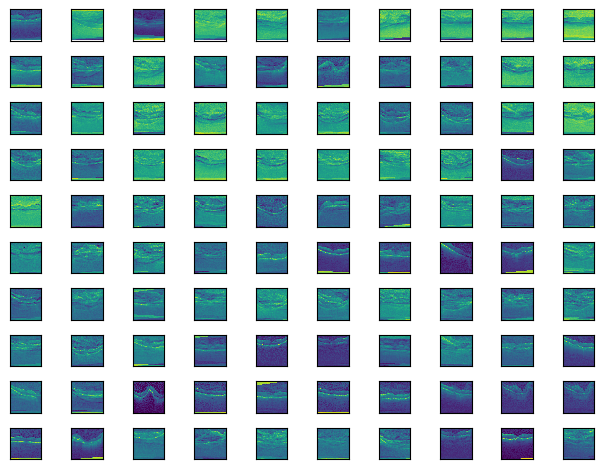

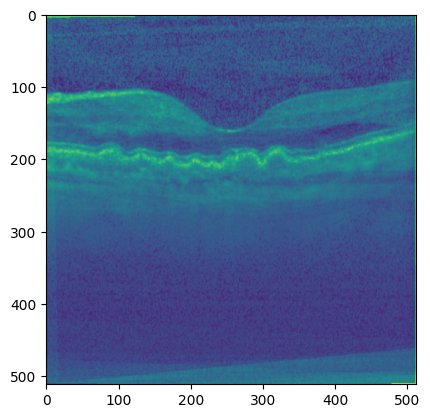

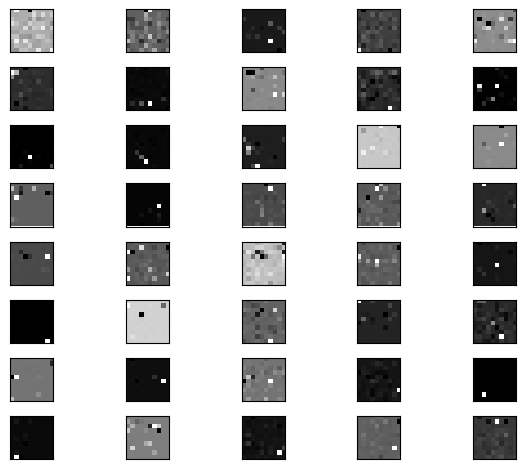

In [ ]:
#All data classes

#Feature extraction percent
print(np.mean(X_tr == 0))
X_hat = X_tr @ dl_model.components_
print(np.mean(np.sum((X_hat - X) ** 2, axis=1) / np.sum(X ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255)

#################################

# Visualize transformed images
representatives = X_tr
fig, axes = plt.subplots(nrows=8, ncols=5)
axes = axes.flatten()

for i in range(X_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, cmap = 'gray', interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [10]:
# Create a dictionary learning model for NORMAL data
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_NORMAL = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_NORMAL -= np.mean(X_NORMAL, axis=0)
X_NORMAL /= np.std(X_NORMAL, axis=0)

# Fit the model to the flattened NORMAL image data
dl_model_NORMAL.fit(X_NORMAL)
ATOMS_NORMAL = dl_model_NORMAL.components_
X_NORMAL_tr = dl_model_NORMAL.transform(X_NORMAL)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [11]:
# Create a dictionary learning model for DME data
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_DME = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_DME -= np.mean(X_DME, axis=0)
X_DME /= np.std(X_DME, axis=0)

# Fit the model to the flattened DME image data
dl_model_DME.fit(X_DME)
ATOMS_DME = dl_model_DME.components_
X_DME_tr = dl_model_DME.transform(X_DME)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [12]:
# Create a dictionary learning model for CNV data
n_components = 100  # Number of atoms in the dictionary
alpha = 0.8  # Sparsity controlling parameter
batch_size = 3  # Number of samples per mini-batch
n_iter = 100  # Number of iterations

dl_model_CNV = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter)

#Normalized data
X_CNV -= np.mean(X_CNV, axis=0)
X_CNV /= np.std(X_CNV, axis=0)

# Fit the model to the flattened CNV image data
dl_model_CNV.fit(X_CNV)
ATOMS_CNV = dl_model_CNV.components_
X_CNV_tr = dl_model_CNV.transform(X_CNV)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [13]:
!mkdir '/content/atoms'


In [14]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  dictl_subfolder = os.path.join('/content/atoms/',subfolder)

  os.makedirs(dictl_subfolder, exist_ok=True)

In [15]:

#atoms save as an image
atoms_all = ATOMS_NORMAL
#for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_DRUSEN,'DRUSEN'], [ATOMS_CNV,'CNV']]:
for atom in [[ATOMS_NORMAL,'NORMAL'], [ATOMS_DME,'DME'], [ATOMS_CNV,'CNV']]:
  for i in range(n_components):
    atoms_save = atom[0][i].reshape((512, 512))*255
    atoms_save = atoms_save.astype(np.uint8)
    destination_atom_folder = os.path.join('/content/atoms/', atom[1], str(i)+'.jpeg')
    cv2.imwrite(destination_atom_folder, atoms_save)

0.3565
5.846489993808036e-13


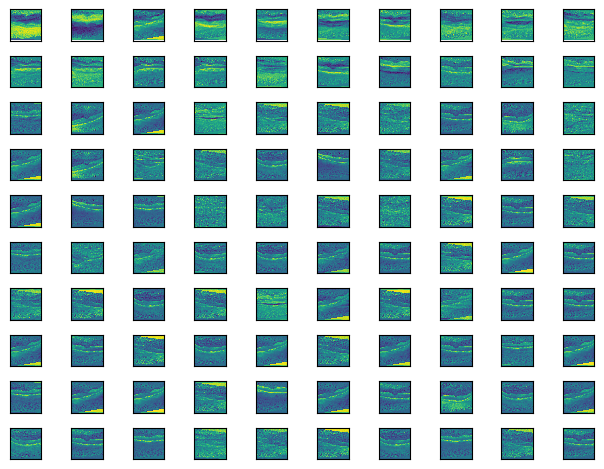

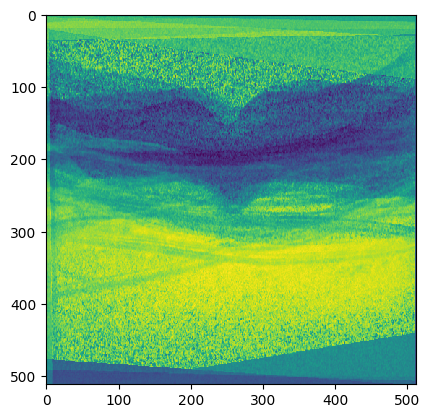

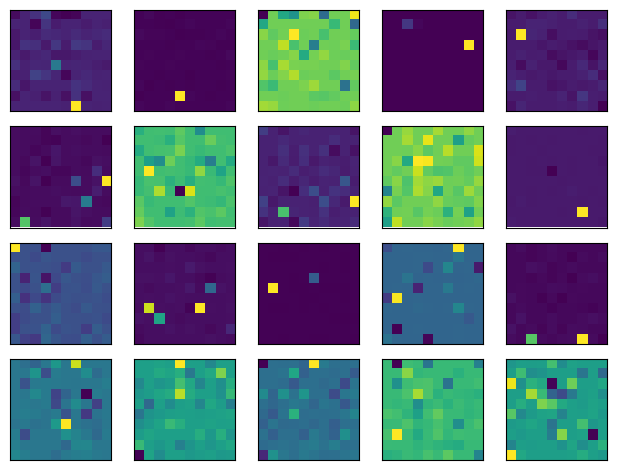

In [16]:
#NORMAL data

#Feature extraction percent
print(np.mean(X_NORMAL_tr == 0))
X_NORMAL_hat = X_NORMAL_tr @ dl_model_NORMAL.components_
print(np.mean(np.sum((X_NORMAL_hat - X_NORMAL) ** 2, axis=1) / np.sum(X_NORMAL ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_NORMAL
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_NORMAL_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_NORMAL_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.3925
1.239465035690791e-12


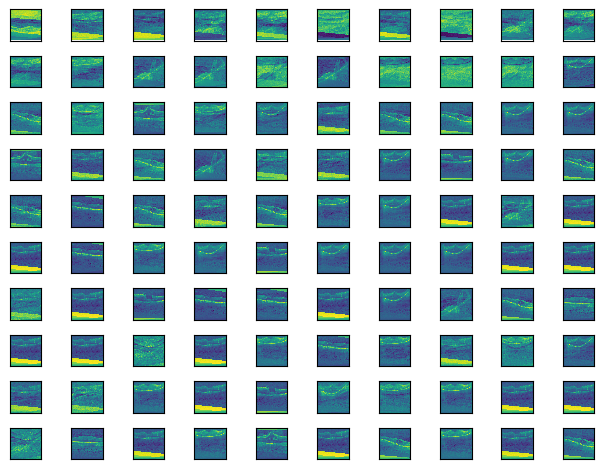

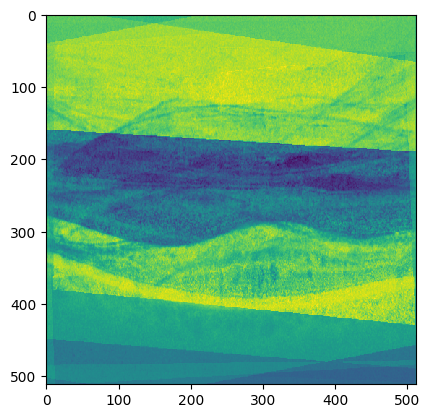

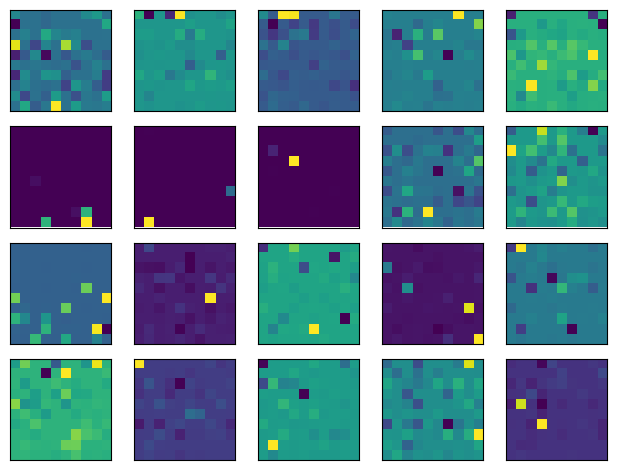

In [17]:
#DME data

#Feature extraction percent
print(np.mean(X_DME_tr == 0))
X_DME_hat = X_DME_tr @ dl_model_DME.components_
print(np.mean(np.sum((X_DME_hat - X_DME) ** 2, axis=1) / np.sum(X_DME ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_DME
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_DME_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_DME_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


0.3715
8.23515635179093e-13


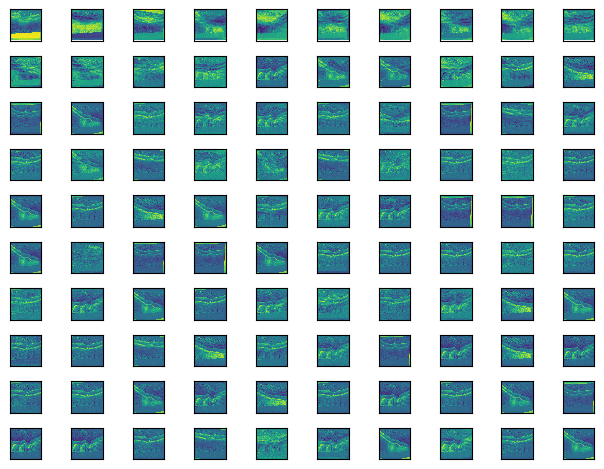

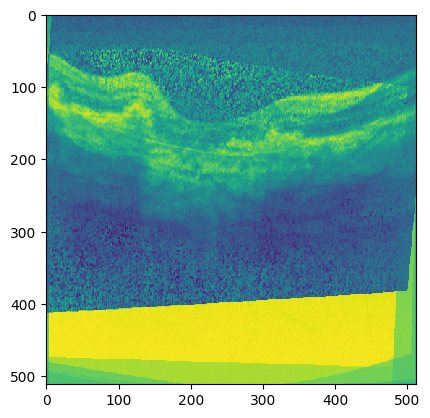

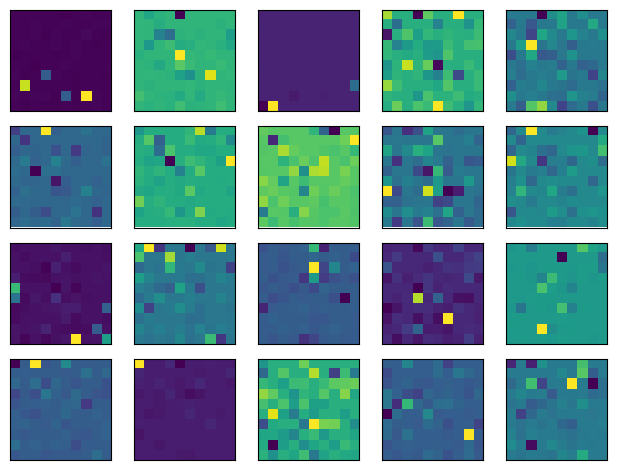

In [18]:
#CNV data

#Feature extraction percent
print(np.mean(X_CNV_tr == 0))
X_CNV_hat = X_CNV_tr @ dl_model_CNV.components_
print(np.mean(np.sum((X_CNV_hat - X_CNV) ** 2, axis=1) / np.sum(X_CNV ** 2, axis=1)))

#############################################

# Visualize learned dictionary atoms (representatives)
representatives = ATOMS_CNV
fig, axes = plt.subplots(nrows=10, ncols=10)
axes = axes.flatten()

for i in range(n_components):
    axes[i].imshow(representatives[i].reshape((height, width))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


#################################

plt.imshow(representatives[0].reshape((height, width))*255, interpolation='nearest')

#################################

# Visualize transformed images
representatives = X_CNV_tr
fig, axes = plt.subplots(nrows=4, ncols=5)
axes = axes.flatten()

for i in range(X_CNV_tr.shape[0]):
    axes[i].imshow(representatives[i].reshape((10, 10))*255, interpolation='nearest')
    axes[i].set_xticks(())
    axes[i].set_yticks(())

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


In [ ]:
#@title Classification using YOLOv8

In [ ]:
!pip install ultralytics

In [19]:
shutil.rmtree('/content/oct_my_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dataset'

In [20]:
import os
!mkdir '/content/oct_my_dataset'
!mkdir '/content/oct_my_dataset/train'
!mkdir '/content/oct_my_dataset/test'
!mkdir '/content/oct_my_dataset/val'


In [21]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_dataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_dataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_dataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [24]:
import shutil


# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset'  # Replace with your source folder path
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/'  # Replace with your destination folder path

#for folder in [['train/',500], ['test/',100], ['val/',8]]
for folder in [['train/',600], ['test/',200]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            shutil.copy(source_path, destination_path)
            #print(f"Copied: {file_name}")


In [25]:
#Separate and store Val data from train data
# Define source and destination directories
dataset_folder = '/content/oct_my_dataset/train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/val/'  # Replace with your destination folder path



for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for num in range(500,600):
    file_name = files_to_copy[num]
    if file_name.endswith('.jpeg'):  # Specify the image file formats
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, subfolder) + '/'
        shutil.copy(source_path, destination_path)
        #print(f"Copied: {file_name}")

In [26]:
shutil.rmtree('/content/oct_my_trdataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_trdataset'

In [27]:
import os
!mkdir '/content/oct_my_trdataset'
!mkdir '/content/oct_my_trdataset/train'
!mkdir '/content/oct_my_trdataset/test'
!mkdir '/content/oct_my_dataset/val'

mkdir: cannot create directory ‘/content/oct_my_dataset/val’: File exists


In [28]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_trdataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_trdataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_trdataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [30]:
import shutil


# Define source and destination directories
dataset_folder = '/content/oct_my_dataset'
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_trdataset/'  # Replace with your destination folder path

img_train = []
img_test = []
img_val = []


#for folder in [['train/',500], ['test/',100]]:
for folder in [['train/',500], ['test/',200], ['val/',100]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            #shutil.copy(source_path, destination_path)
            img = Image.open(source_path) # This returns an image object
            #print(img.mode)
            #img = img.convert('RGB')
            img = np.asarray(img) # convert it to ndarray
            img = cv2.resize(img, (512, 512))
            img = img.reshape((1, 512 * 512))
            img = img.astype(float)
            img /= 255.0

            # #Normalized data
            #img -= np.mean(img, axis=0)
            #img /= np.std(img, axis=0)


            if subfolder == 'NORMAL':
              img_tr = dl_model_NORMAL.transform(img)
            elif subfolder == 'DME':
              img_tr = dl_model_DME.transform(img)
            #elif subfolder == 'DRUSEN':
              #img_tr = dl_model_DRUSEN.transform(img)
            elif subfolder == 'CNV':
              img_tr = dl_model_CNV.transform(img)



            img_tr2d = img_tr.reshape((10, 10))*255
            img_tr2d = img_tr2d.astype(np.uint8)

            # Save the image to the specified directory
            save_destination = os.path.join(destination_path, file_name)
            #image_to_save.save(save_destination)
            cv2.imwrite(save_destination, img_tr2d)

            if folder[0] == 'train/':
              img_train.append(img_tr2d)
            elif folder[0] == 'test/':
              img_test.append(img_tr2d)
            elif folder[0] == 'val/':
              img_val.append(img_tr2d)


            #images.append(img_tr2d)
            #print(f"Copied: {file_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the di

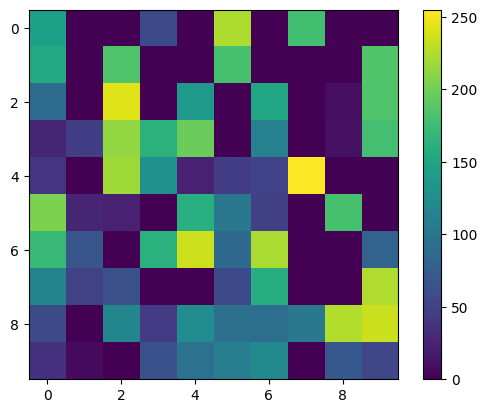

In [31]:
plt.imshow(img_tr2d.reshape((10, 10)), interpolation='nearest')
plt.colorbar()

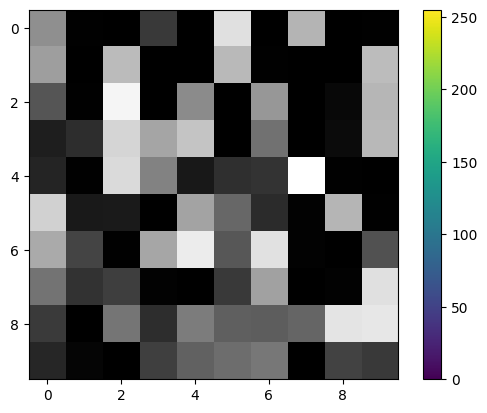

In [32]:
c = cv2.imread(save_destination)
plt.imshow(c, interpolation='nearest')
plt.colorbar()

In [33]:
from ultralytics import YOLO

# Load a model

#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
#model = YOLO('/content/best.pt') #Load the initial weights, gained from the former model training on this data (previous line)

model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/oct_my_trdataset', epochs=100, imgsz=10, batch=64)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 237MB/s]

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights


Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/oct_my_trdataset, epochs=100, time=None, patience=50, batch=64, imgsz=10, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

train: Scanning /content/oct_my_trdataset/train... 1500 images, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 3848.00it/s]


train: New cache created: /content/oct_my_trdataset/train.cache


val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 4881.22it/s]

val: New cache created: /content/oct_my_trdataset/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G      1.469         64         32:   8%|▊         | 2/24 [00:00<00:08,  2.50it/s]

      1/100         0G      1.521         64         32:  12%|█▎        | 3/24 [00:01<00:07,  2.79it/s]
100%|██████████| 755k/755k [00:00<00:00, 59.1MB/s]
      1/100         0G      1.368         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.17it/s]

                   all      0.393          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G      1.258         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.21it/s]

                   all      0.373          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G      1.202         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]

                   all      0.403          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G      1.164         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.27it/s]

                   all       0.47          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G      1.103         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all       0.52          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G      1.071         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]

                   all       0.57          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G      1.087         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.26it/s]

                   all       0.59          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G     0.9831         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all      0.563          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G     0.9506         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.52it/s]

                   all      0.627          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G      0.959         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.91it/s]

                   all      0.697          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G      0.881         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.74it/s]

                   all      0.757          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G     0.8972         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.58it/s]

                   all      0.737          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G     0.8916         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.97it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G     0.8298         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all       0.79          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G     0.7801         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G     0.7791         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G     0.7825         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G     0.7413         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.28it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G       0.76         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.97it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G     0.7314         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G     0.7095         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.36it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G     0.7264         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.69it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G     0.6717         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G     0.6894         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.33it/s]

                   all      0.873          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G     0.6457         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.27it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G     0.6537         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G     0.6352         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.44it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G     0.6315         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.72it/s]

                   all      0.907          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G     0.6269         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.72it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G     0.6577         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.43it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G     0.6378         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.87it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G     0.6203         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G     0.6182         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.62it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G     0.6377         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.18it/s]

                   all       0.92          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G     0.6025         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G     0.5802         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.77it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G     0.6001         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.86it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G     0.6125         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.51it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G       0.58         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G     0.5571         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G     0.5906         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.63it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G     0.6147         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.60it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G     0.5287         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G      0.575         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G     0.5816         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.38it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G     0.5284         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G     0.5716         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G     0.5421         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.78it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G     0.5481         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G     0.5719         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.55it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G     0.5432         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.86it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G     0.5416         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G     0.5321         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.15it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G     0.5032         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.01it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G     0.5433         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G     0.4932         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.08it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G     0.4678         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G     0.5177         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.64it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G     0.5592         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.28it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G     0.5053         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.59it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G     0.4958         28         32: 100%|██████████| 24/24 [00:07<00:00,  3.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G     0.5039         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.91it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G     0.4753         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.83it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G     0.4682         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.45it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G     0.4527         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.17it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G     0.4659         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.68it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G     0.4858         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.60it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G     0.5097         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.22it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G     0.4781         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G     0.5059         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.69it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G     0.4546         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G     0.5114         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.16it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G     0.4991         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.54it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G     0.4429         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G     0.4742         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G     0.4443         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.34it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G      0.498         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G     0.4687         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.04it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G      0.447         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G      0.452         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.12it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G     0.4513         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  7.64it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G     0.4546         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.31it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G     0.4571         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G     0.4593         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.47it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G     0.4445         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.67it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G     0.4269         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.77it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G     0.4697         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G     0.4544         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G     0.4068         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.68it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G      0.423         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.57it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G     0.4816         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.55it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G     0.4371         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.94it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G     0.4719         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.16it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G     0.4548         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.77it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G      0.445         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.88it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G     0.4621         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.14it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G     0.4444         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.52it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G     0.4563         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G     0.4319         28         32: 100%|██████████| 24/24 [00:05<00:00,  4.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.19it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G      0.407         28         32: 100%|██████████| 24/24 [00:06<00:00,  3.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all      0.967          1



100 epochs completed in 0.180 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [34]:
# Validate the modelblob:https://colab.research.google.com/f8428635-acf6-400f-b52f-379198002792
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]


                   all      0.973          1
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


0.9733333587646484

In [ ]:
# @title Predict using the model



In [35]:
#test_score = model.predict(source='/content/oct_my_trdataset/test/Normal')
#0:AMD 1:DME 2:Normal
label_predict = []
label_conf = []
label_true = []

test_path = '/content/oct_my_trdataset/test/'

for subfolder in ['NORMAL', 'DME', 'CNV']:
  test_img_dir = os.path.join(test_path, subfolder)
  test_img = model(test_img_dir)

  for num in range(200):
    label_true.append(subfolder)
    label_predict.append(test_img[num].names[test_img[num].probs.top1])
    label_conf.append(test_img[0].probs.top1conf)

print(label_true)
print(label_predict)
print(label_conf)


image 1/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-101880-1.jpeg: 32x32 NORMAL 0.80, DME 0.18, CNV 0.02, 5.0ms
image 2/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1025847-1.jpeg: 32x32 NORMAL 0.97, CNV 0.03, DME 0.00, 6.4ms
image 3/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1038998-1.jpeg: 32x32 NORMAL 0.84, DME 0.11, CNV 0.05, 5.5ms
image 4/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1042462-1.jpeg: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 4.9ms
image 5/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1058176-1.jpeg: 32x32 CNV 0.89, NORMAL 0.11, DME 0.00, 4.9ms
image 6/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1063128-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.2ms
image 7/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1073137-1.jpeg: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.9ms
image 8/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1081406-1.jpeg: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.4ms
image 9/200 /content/oct_my_trdataset/test/NORMAL/NORMAL

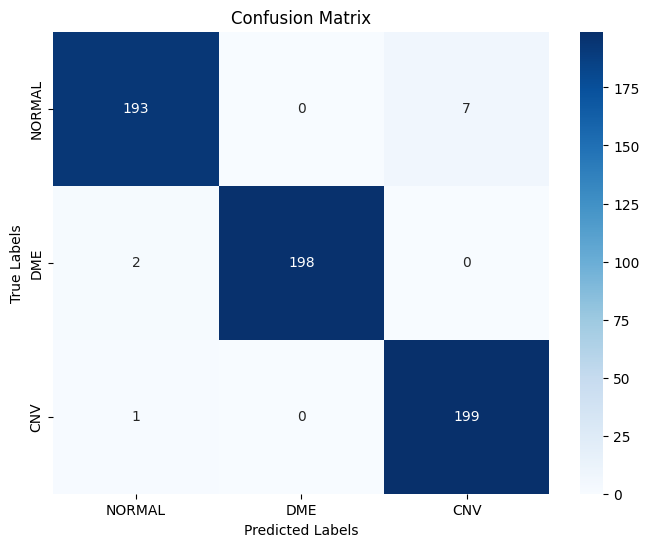

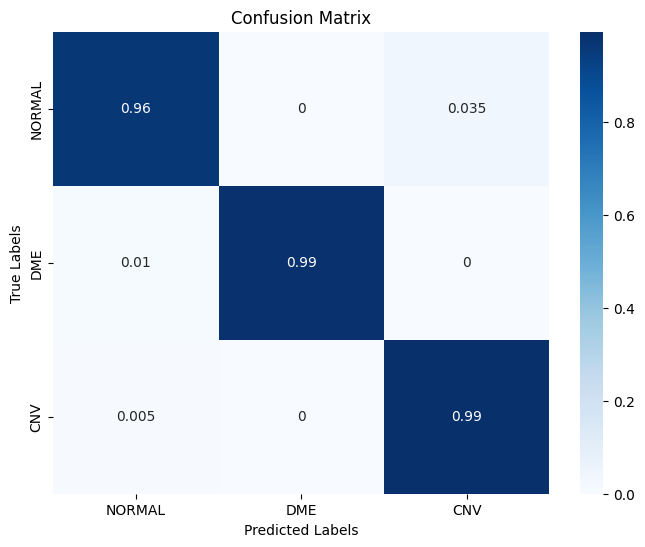

True

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'])
conf_matrix_norm = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'], normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_image = np.array(heatmap.get_figure().canvas.renderer.buffer_rgba())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap_norm = sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_norm_image = np.array(heatmap_norm.get_figure().canvas.renderer.buffer_rgba())

cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix.jpeg', heatmap_image)
cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix_norm.jpeg', heatmap_norm_image)

In [ ]:
shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset')

In [38]:
shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dictl_dataset')

In [39]:
shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset')

In [40]:
shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/atoms')

In [41]:
shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/runs')

In [ ]:
#copy folders to google drive
shutil.copytree("/content/oct_my_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset'

In [42]:
shutil.copytree("/content/oct_my_dictl_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dictl_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dictl_dataset'

In [43]:
shutil.copytree("/content/oct_my_trdataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset'

In [44]:
shutil.copytree("/content/atoms", "/content/drive/MyDrive/oct_classification/kermany_dataset/atoms")

'/content/drive/MyDrive/oct_classification/kermany_dataset/atoms'

In [45]:
shutil.copytree("/content/runs", "/content/drive/MyDrive/oct_classification/kermany_dataset/runs")

'/content/drive/MyDrive/oct_classification/kermany_dataset/runs'

In [ ]:
#@title Dictlearn tests - incomplete

In [ ]:
!git clone https://github.com/permfl/dictlearn.git /content/dictlearn

Cloning into '/content/dictlearn'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 152 (delta 1), reused 2 (delta 0), pack-reused 145
Receiving objects: 100% (152/152), 2.11 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!pip install dictlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
%cd /content/dictlearn
!pip install --file requirements.txt

/content/dictlearn

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --file


In [ ]:
!python setup.py install

Installing dictlearn...
Compiling /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx because it changed.
Compiling /content/dictlearn/dictlearn/_dictlearn/hessian.pyx because it changed.
[1/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
/usr/local/lib/python3.10/dist-packag

In [ ]:
import dictlearn as dl
dictionary = dl.dct_dict(256, 8)

AttributeError: module 'dictlearn' has no attribute 'dct_dict'

In [ ]:
import dictlearn as dl
dl.
image = dl.imread('examples/images/house.png')
image_patches = dl.Patches(image, 8)
matrix = image_patches.patches
matrix.shape

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl

denoise = dl.Denoise('noisy_image.png')
denoised_image = denoise.train().denoise()
plt.imshow(denoised_image)
plt.show()

AttributeError: module 'dictlearn' has no attribute 'Denoise'

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip show dictlearn

Name: dictlearn
Version: 0.2.1
Summary: Dictionary Learning Toolbox
Home-page: https://gitlab.com/unibuc/graphomaly/dictionary-learning
Author: Paul Irofti, Denis Ilie-Ablachim, Bogdan Dumitrescu
Author-email: graphomaly@fmi.unibuc.ro
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
print(dir(dl))
dl.kernels()

['DictionaryLearning', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_dictionary_learning', '_get_fit_handle', 'dictionary_learning', 'kernel_dictionary_learning', 'kernels', 'methods', 'online_dictionary_learning', 'sparse_encode']


In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl
dl.
inpainter = dl.inpaint('image.png', 'mask.png')
inpainted_image = inpainter.train().inpaint()

plt.subplot(121)
plt.imshow(inpainter.patches.image)
plt.title('Original')

plt.subplot(122)
plt.imshow(inpainted_image)
plt.title('Inpainted')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'inpaint'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('images/vessel.png')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True, n_init=3)
patch_size = (30, 30)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  300 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  400 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Part

In [ ]:
a = faces.images

In [ ]:
a.dtype

dtype('float32')

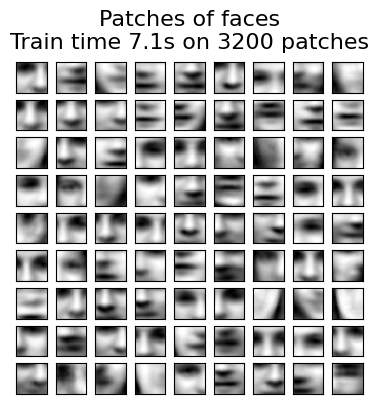

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()